In [ ]:
import matplotlib.pyplot as p
import matplotlib.colors as colors
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import argparse
import seaborn as sns
from statistics import mean


In [2]:
class_assignment = "classifier_ranges.tsv"
#Set class values (probably better to read in a file instead of hard code)
classes = pd.read_csv(class_assignment, delimiter='\t')
class_list = []

for c in classes['Class_Ranges']:
    print(c)
    class_list.append(c)
    print(class_list)

hex_list = []

for waves in class_list:
    gamma = 0.8
    intensity_max = 1
    wave = waves
    if wave < 380:
            red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0

    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0

    def f(c):
        if c == 0:
                return 0
        else:
                return intensity_max * pow (c * factor, gamma)
        
    #color = f"{f(red)},{f(green)},{f(blue)}"
    color = [f(green),f(blue),f(red)] 
    print(color)
    hex = colors.rgb2hex(color, keep_alpha=True)
    hex_list.append(hex)

print(hex_list)

340
[340]
360
[340, 360]
380
[340, 360, 380]
420
[340, 360, 380, 420]
450
[340, 360, 380, 420, 450]
480
[340, 360, 380, 420, 450, 480]
490
[340, 360, 380, 420, 450, 480, 490]
495
[340, 360, 380, 420, 450, 480, 490, 495]
505
[340, 360, 380, 420, 450, 480, 490, 495, 505]
520
[340, 360, 380, 420, 450, 480, 490, 495, 505, 520]
560
[340, 360, 380, 420, 450, 480, 490, 495, 505, 520, 560]
[0, 0, 0]
[0, 0, 0]
[0, 0.3816778909618176, 0.3816778909618176]
[0, 1.0, 0.41524364653850576]
[0.27594593229224296, 1.0, 0]
[0.8365116420730186, 1.0, 0]
[1.0, 1.0, 0]
[1.0, 0.7944178807866091, 0]
[1.0, 0.32987697769322355, 0]
[1.0, 0, 0.21082473737065027]
[1.0, 0, 0.7640074112321921]
['#000000ff', '#000000ff', '#006161ff', '#00ff6aff', '#46ff00ff', '#d5ff00ff', '#ffff00ff', '#ffcb00ff', '#ff5400ff', '#ff0036ff', '#ff00c3ff']


#000000ff
#000000ff
#006161ff
#00ff6aff
#46ff00ff
#d5ff00ff
#ffff00ff
#ffcb00ff
#ff5400ff
#ff0036ff
Annotation(350, 550, 'r^2 = 0.894')


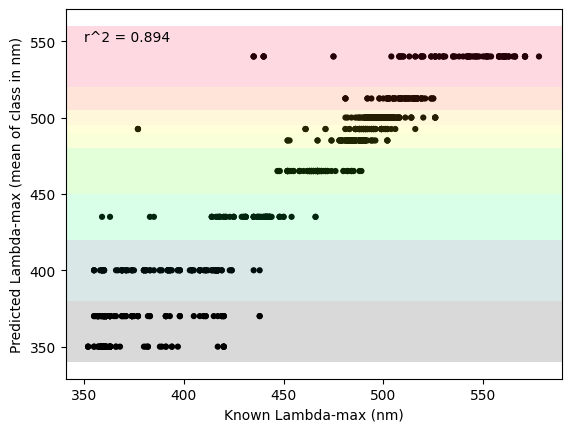

In [6]:

file = "wds_classifier_test_results_t2.csv"
outfile = "test"
#https://academo.org/demos/wavelength-to-colour-relationship/

#Read data
table = pd.read_csv(file, delimiter = ',')

#Duplicate predicted class next to change to actual lmax 
table['Predicted_lmax'] = table.loc[:, 'Predicted_Class']
i = 0
for colors in class_list:
#Convert class values to median lambda max value of that class in new column
    if i+1 != len(class_list):
        table['Predicted_lmax'] = table['Predicted_lmax'].replace(i,mean([class_list[i],class_list[i+1]]))
        i+=1
    else: 
        pass


colorby='Score'

#2d
sns.scatterplot(x='Lambda_Max', y='Predicted_lmax', data=table, edgecolor = 'none', color = 'black', s = 20)
plt.xlabel('Known Lambda-max (nm)')
plt.ylabel('Predicted Lambda-max (mean of class in nm)')

i = 0
alpha = 0.05
for wavelengths in class_list:
    if i+1 < len(hex_list):
        print(hex_list[i])
        plt.axhspan(class_list[i],class_list[i+1], facecolor=hex_list[i], alpha=0.15)
        i+=1
    else: 
        pass
    #place colored bands behind plot

m = plt.annotate("r^2 = {:.3f}".format(r2_score(table['Lambda_Max'],table['Predicted_lmax'])), (350, 550))
print(m)
#If no file name show on screen otherwise save pdf
if outfile == '' :
    plt.show()
else:
    fileout = outfile + '.pdf'
    plt.savefig(fileout)

